# Tutorial Notebook for Hunstead Lecture II: 
# Bayesian Inference and the Logic of Discovery

## Problem 1: The Curse of Dimensionality

### 1a) Sampling in low dimensions

Generate a sample of 100 randomly distributed points inside a 2D square. 

### 1b) Distances in low dimensions

Calculate the pairwise distances between all of the points, in d-dimensions, for two points x_i and y_i, this quantity is

$$ |x - y| = \sqrt{\Sigma^d (x_i - y_i)^2} $$

### 1c) Distribution of distances in low dimensions 

Plot the distribution of these distances. Do you notice anything interesting? Is a "special value" picked out?

### 1d) Extending to d-dimensions

Now, let's consider the difference between picking a point located in a d-dimensional sphere vs in a d-dimensional cube. To do this, calculate and plot the the difference between the volume of a cube with unit-length sides and the volume of a unit-radius sphere as the dimension d of the space increases. Possibly helpful formula: 

$$ Sphere: V_d = \frac{\pi^{d/2}}{\frac{d}{2} \Gamma(\frac{d}{2})} $$

$$ Cube: V_d = L^d $$

The proof of this formula is left as an exercise to the reader. 

### 1e) Sampling in d-dimensions

Now, consider the problem of sampling in high-dimensions. If we use a uniform prior on every parameter, our expectation is that we will well sample the parameter space simply by picking in a "uniform way". Calculate the ratio of volume contained in an annulus between $R$ and $R - \epsilon$ for d = 1-20 and plot this. Interpret your result in terms of a sampling problem. Are uniform priors a good choice in higher dimensions? Why or why not?

In [1]:
# 1a) Random points in 2D

import numpy as np
import matplotlib.pyplot as plt

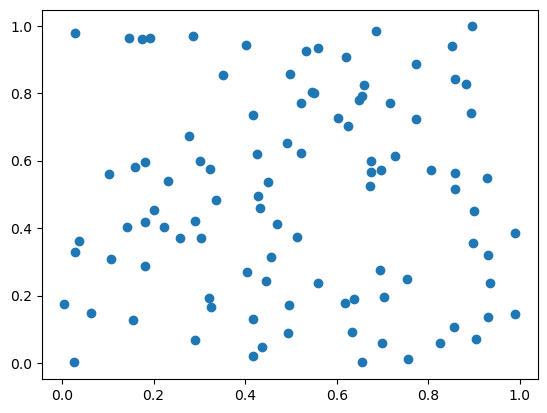

In [2]:
x, y = np.random.rand(2, 100)
plt.scatter(x, y)

Text(0, 0.5, 'counts')

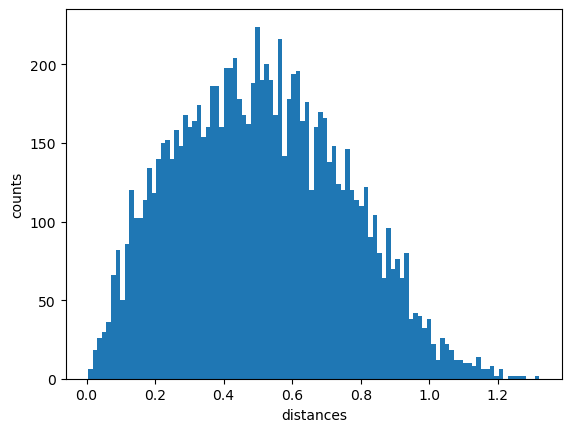

In [3]:
# 1b and 1c) calculate pairwise distances for x, y

def distance(pt1, pt2):
    return np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)

distance_list = []

for pt1 in np.array(list(zip(x,y))):
    for pt2 in np.array(list(zip(x,y))):
        if distance(pt1, pt2) > 0:
            distance_list.append(distance(pt1, pt2))
            
plt.hist(distance_list, bins = 100)
plt.xlabel('distances')
plt.ylabel('counts')


/var/folders/r9/vf1sqnrn01n0nzmbl59dbqjc0000gn/T/ipykernel_7830/2871646667.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return np.pi**(d/2) / ((d/2)*gamma(d/2))


Text(0.5, 0, 'dimensions')

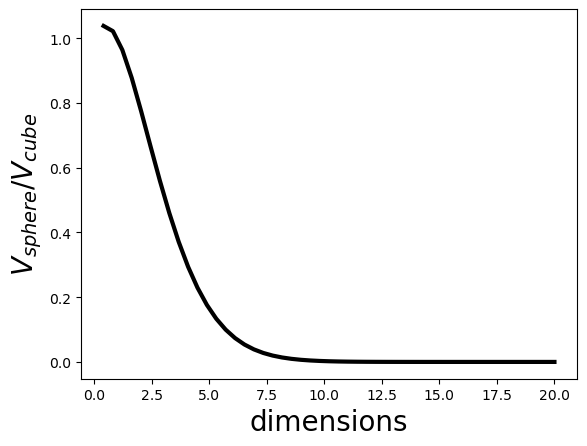

In [4]:
# 1d) 

from scipy.special import gamma 

def V_d_sphere(d):
    return np.pi**(d/2) / ((d/2)*gamma(d/2))

def V_d_cube(d):
    return 2**d

Ratios = []
dimensions = np.linspace(0, 20)

for d in dimensions:
    Ratios.append(V_d_sphere(d)/V_d_cube(d))

plt.plot(dimensions, Ratios, lw = 3, color = 'k')
plt.ylabel('$V_{sphere}$/$V_{cube}$', fontsize = 20)
plt.xlabel('dimensions', fontsize = 20)

Text(0.5, 0, 'dimensions')

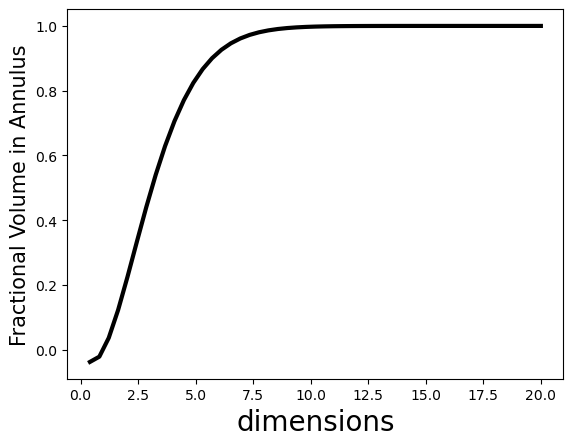

In [5]:
# after some pen and paper math, it becomes clear that this ratio is simply (1-\epsilon)^d

def ratio(d, epsilon):
    return (1 - epsilon)**d

ratio_list = []

for d in dimensions: 
    ratio_list.append(ratio(d, 0.1))
    
plt.plot(dimensions, 1-np.array(Ratios), lw = 3, color = 'k')
plt.ylabel('Fractional Volume in Annulus', fontsize = 15)
plt.xlabel('dimensions', fontsize = 20)

## Problem 2: Probability Transformations in Astronomy

This example comes from the documentation for the AstroML package, a very useful collection of statistics and ML tools written by astronomers. It is a famous example of where a common transformation in astronomy does not preserve all of the properties of the underlying distribution. 

### Problem 2a) Generate some underlying normally distributed flux data

Hint: you can do this most easily with scipy.stats.norm(), norm.rvs. Your life in 4d) will be slightly easier if you generate an odd number of samples.

### Problem 2b) Transform fluxes to magnitudes

The magnitude of a source is defined as mag $= -2.5 \log_{10}(F)$. transform your normally distributed flux data to magnitudes. 

### Problem 2c) Plot your results

Plot the flux and magnitude distribution. How has the transformation changed the shape of the distribution?

### Problem 2d) Cumulative Distribution Function

Plot the CDF of each distribution and discuss the properties of the CDF.

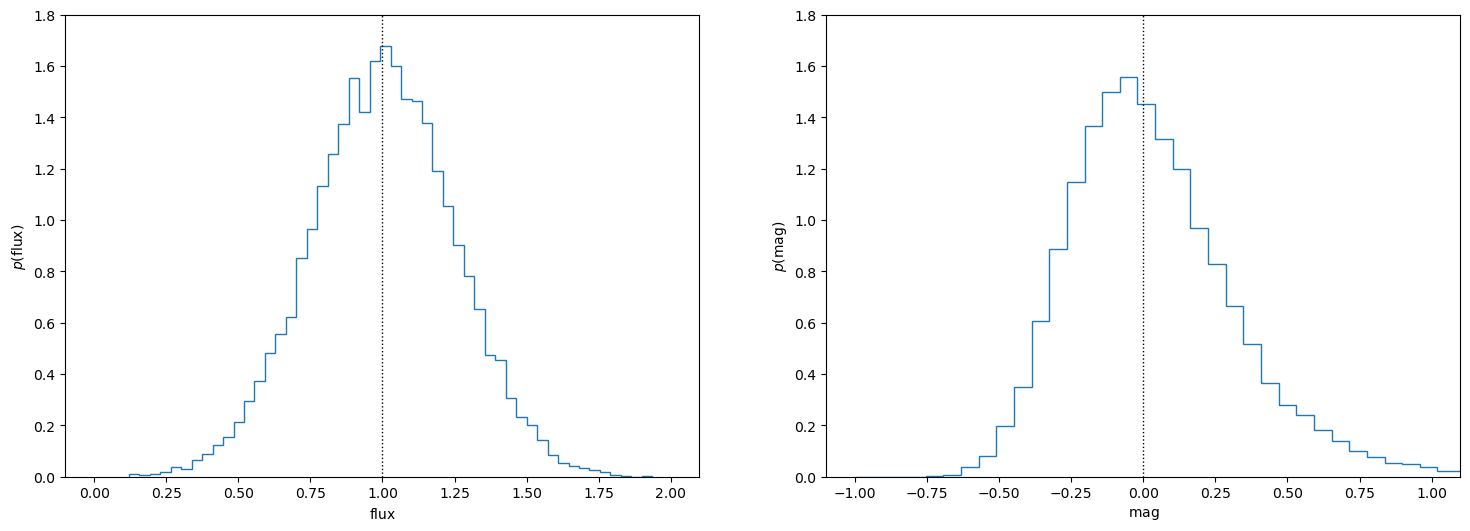

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 1.1000e+01,
        2.4000e+01, 4.9000e+01, 9.4000e+01, 1.7100e+02, 3.1000e+02,
        5.1900e+02, 8.2000e+02, 1.2110e+03, 1.8000e+03, 2.5360e+03,
        3.3770e+03, 4.3090e+03, 5.2970e+03, 6.2640e+03, 7.1630e+03,
        7.9440e+03, 8.5760e+03, 9.0620e+03, 9.4030e+03, 9.6540e+03,
        9.7950e+03, 9.9010e+03, 9.9450e+03, 9.9740e+03, 9.9900e+03,
        9.9990e+03, 1.0000e+04, 1.0001e+04, 1.0001e+04]),
 array([-1.        , -0.93877551, -0.87755102, -0.81632653, -0.75510204,
        -0.69387755, -0.63265306, -0.57142857, -0.51020408, -0.44897959,
        -0.3877551 , -0.32653061, -0.26530612, -0.20408163, -0.14285714,
        -0.08163265, -0.02040816,  0.04081633,  0.10204082,  0.16326531,
         0.2244898 ,  0.28571429,  0.3

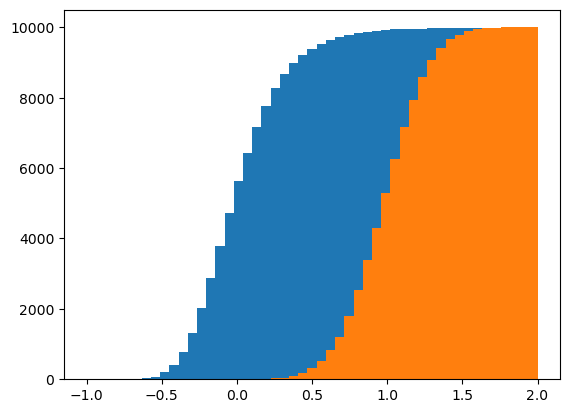

In [6]:
from scipy.stats import norm

#------------------------------------------------------------
# Create our data

# generate 10000 normally distributed points
dist = norm(1, 0.25)
flux = dist.rvs(10001)

# transform this distribution into magnitude space
mag = -2.5 * np.log10(flux)


# plot the flux and magnitude distributions 

fig = plt.figure(figsize=(18,6))

# first plot the flux distribution
ax1 = fig.add_subplot(121)
ax1.hist(flux, bins=50, histtype='step', density=True)

ax2 = fig.add_subplot(122)
ax2.hist(mag, bins=np.linspace(-1, 2, 50), histtype='step', density=True)

ax1.plot([1, 1], [0, 2], ':k', lw=1)
ax1.set_xlim(-0.1, 2.1)
ax1.set_ylim(0, 1.8)

ax1.set_xlabel(r'${\rm flux}$')
ax1.set_ylabel(r'$p({\rm flux})$')


ax2.plot([0, 0], [0, 2], ':k', lw=1)
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(0, 1.8)

ax2.set_xlabel(r'${\rm mag}$')
ax2.set_ylabel(r'$p({\rm mag})$')

plt.show()

# plot the Cumulative distributive function

plt.hist(mag, bins=np.linspace(-1, 2, 50), cumulative = True)

plt.hist(flux, bins=np.linspace(-1, 2, 50), cumulative = True)

## Problem 3: Not everything is Gaussian (and some Practice with Bayes Theorem)

The Gaussian distribution is very common, but not universal. In a (perhaps apocryphal story) this problem was given to first year students at Cambridge in the 1980s. It concerns estimating the distance to an off-shore lighthouse based on the timing of pulses. A canonical statement of the problem is, 

"A lighthouse is situated at unknown coordinates $x_0,y_0$ with respect to a straight coastline y=0. It sends a series of N flashes in random directions, and these are recorded on the coastline at positions $x_i$." 

### Problem 3-0) Draw the picture. 

Start by drawing the picture. It is very useful.

### Problem 3a) Prior 

Write down a prior for the $x_0, y_0$ position of the lighthouse. Implement a python function that returns a uniform probability (or if you'd like, another prior) for $x_0, y_0$. Hint: It is easier to write the prior in terms of the angle $\theta$ between the line connecting the lighthouse to the shore and the direction in which the pulse is emitted. 

### Problem 3b) Likelihood 

Now, we need to determine the form of the likelihood. If you following the hint in 3a), we want to turn a function of the data (shoreline positions, x) in terms of the angle ($\theta$). First, write down the relationship between the $x_0$ position of the lighthouse, the data x, and the angle ($\theta$). 

### Problem 3c) Generate some data

In order to produce a Bayesian estimate of the x-y position, we'll need some data. 

### Problem 3d) Posterior

Using Bayes' theorem, write down the posterior. Implement a grid search function to calculate the posterior for the x-y position of the lighthouse. 


### Problem 3e) [Optional] Challenge: Is your likelihood a Gaussian? What is special about your likelihood?

One property of a Gaussian that makes it "special" is that it is the maximum entropy distribution for for finite first and second moments. Calculate the first and second moments of your likelihood distribution. What makes this distribution special? Generate some example plots of your likelihood function and compare to a Gaussian distribution over the same range. Are these curves the same? What is different about them?

In [2]:
from numpy.random import uniform 
import matplotlib.pyplot as plt

# unknown true values of the position 

x_0 = 10
y_0  = 30

# generate data
thetas = uniform(-np.pi/2,np.pi/2, 100)

In [13]:
thetas

array([-0.62027683,  1.56495017,  0.70991451,  1.50556068, -0.40655575,
        0.11544899,  0.56861592, -0.9016882 , -0.06943635,  1.14871168,
        0.17669505,  0.2041922 ,  0.96300404, -0.43242369, -0.58381971,
        0.08805139, -0.78635379, -0.64024169, -0.01173772, -0.86551862,
       -0.49801285,  1.15500606, -0.89142327, -0.33836452, -0.44346854,
       -1.48539278, -0.92719815,  0.7229737 , -1.5670827 , -0.84245859,
        1.38643809, -0.15583972, -0.98141216, -0.45737852,  0.58815637,
        0.47145518, -0.91617494,  0.97147206,  1.34193966,  0.04657561,
        0.34537025, -1.18091742, -0.89360944,  1.22779849, -1.39489167,
        1.07420642,  0.40287092,  1.50396441, -0.16462295,  0.52767548,
        0.11128295,  1.26516256,  0.74015218,  0.20593568, -1.37410262,
       -0.32826434,  0.0413474 , -0.83784378, -0.22633609, -0.53063832,
        1.15497713,  1.45964861, -1.33134641,  1.22742092, -0.01792766,
       -0.96423481, -0.60814849, -1.40146144,  0.82536152,  0.37

In [3]:
def make_data(x, y, thetas): 
    return y * np.tan(thetas) + x

xs = make_data(x_0, y_0, thetas)

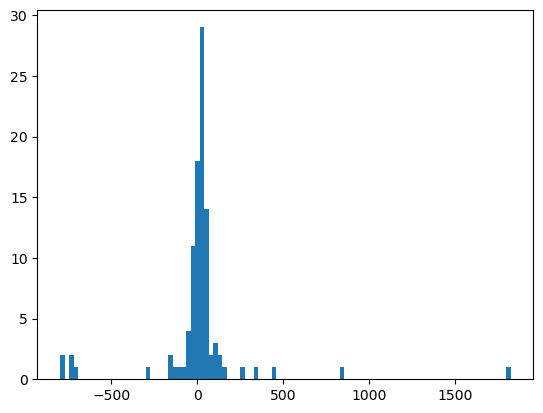

In [4]:
plt.hist(xs, bins=100)
plt.show()

In [5]:
def ln_posterior(x_0, y_0, x):
    log_posterior = np.log((y_0/np.pi) * 1/ (y_0**2 + (x - x_0)**2))
    return log_posterior

In [6]:
def grid_search(x_0_grid, y_0_grid, datum): 
    M, B = np.meshgrid(x_0_grid, y_0_grid)

    posterior_grid = np.zeros(M.shape)
    for i, m, in enumerate(M): 
        for j, b in enumerate(B): 
            posterior_grid[i,j] = ln_posterior(m[i], b[j], datum)
    
    return posterior_grid 

In [7]:
x_0_grid = np.linspace(0, 50, 250)
y_0_grid = np.linspace(0, 50, 250)

posterior = np.zeros((len(x_0_grid), len(y_0_grid)))

for data in xs: 
    posterior += grid_search(x_0_grid, y_0_grid, data)

/var/folders/r9/vf1sqnrn01n0nzmbl59dbqjc0000gn/T/ipykernel_3414/3426239585.py:2: RuntimeWarning: divide by zero encountered in log
  log_posterior = np.log((y_0/np.pi) * 1/ (y_0**2 + (x - x_0)**2))


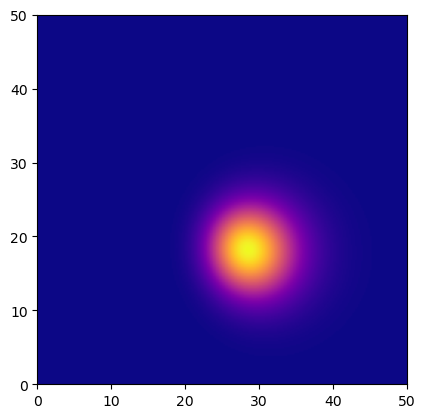

In [8]:
plt.imshow(np.exp(posterior), extent = (0, 50, 0, 50), origin = 'lower', cmap = 'plasma')